Low risk states: 
 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Hawaii' 'Idaho' 'Iowa' 'Kansas'
 'Kentucky' 'Maine' 'Maryland' 'Massachusetts' 'Minnesota' 'Mississippi'
 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Mexico' 'North Dakota'
 'Oklahoma' 'Oregon' 'Rhode Island' 'South Carolina' 'South Dakota' 'Utah'
 'Vermont' 'West Virginia' 'Wisconsin' 'Wyoming']

 Medium risk states: 
 ['Florida' 'Georgia' 'Illinois' 'Indiana' 'Louisiana' 'Michigan'
 'Missouri' 'New Jersey' 'New York' 'North Carolina' 'Ohio' 'Pennsylvania'
 'Tennessee' 'Virginia' 'Washington']

 High risk states: 
 ['California' 'Texas']


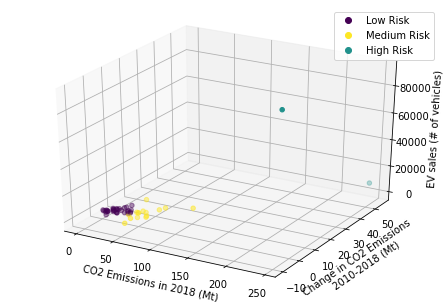

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans 

# extract data from "kmeans_data_EV.xlsx"
data = pd.read_excel("kmeans_data_EV.xlsx")
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.to_numpy()

# get state labels
states = data[1:, 0]

# get rows and columns corresponding to necessary data
data = data[1:, 1:]
kmeans_data = data[:, 0:1]

# extract individual data
emissions_2018 = data[:,0].tolist()
change_in_emissions = data[:,1].tolist()
EV_sales = data[:,2].tolist()

# conduct kmeans
kmeans = KMeans(n_clusters=3,
                n_init=3,
                init='random',
                tol=1e-4, 
                random_state=170,
                verbose=False).fit(kmeans_data)

# plot cluster results
fig = plt.figure()
ax = Axes3D(fig)
scatter = ax.scatter(emissions_2018, change_in_emissions, EV_sales, c=kmeans.labels_)

ax.set_xlabel('CO2 Emissions in 2018 (Mt)')
ax.set_ylabel('Change in CO2 Emissions \n 2010-2018 (Mt)')
ax.set_zlabel('EV sales (# of vehicles)')

handles, labels = scatter.legend_elements()
ax.legend([handles[0], handles[2], handles[1]], ['Low Risk', 'Medium Risk', 'High Risk'])

# determine which states are low, medium, and high risks
low_risk = states[kmeans.labels_ == 0]
medium_risk = states[kmeans.labels_ == 2]
high_risk = states[kmeans.labels_ == 1]

print('Low risk states: \n', low_risk)
print('\n Medium risk states: \n', medium_risk)
print('\n High risk states: \n', high_risk)
